### prepare 100 random samples

In [1]:
import pathlib
from oniakIO import odats
from oniakExp import subsample

root_path = pathlib.Path("/media/gtnetuser/SSD_2TB_BEST/LpSubspace")
data_file = root_path / "data/sift1M.odat"
result_file = root_path / "data/sift100sample.odat"
id_file = root_path / "data/sift100sample_ids.odat"

data = odats.read_file(str(data_file))
sampleddata, sampleids = subsample.subsample(data, 100, 9)
print(sampleddata.shape)
odats.write_file(str(result_file), sampleddata, dtype=odats.odat.float32)
odats.write_file(str(id_file), sampleids, dtype=odats.odat.int32)

(900, 128)


405

### Calculate Ground Truth distance

In [3]:
import subprocess, json

config = {
    "root path": str(root_path),
    "data file": "data/sift100sample.odat",
    "query file": "data/sift_query.odat",
    "subspace rank": 9,
    "number subspaces": 100,
    "dimension": 128,
    "number queries": 100,
    "dataset": "sift",
    "projection dimension": 128,
    "output file": "result/distance_preserve/gnd.odat"
}

json_path = str(root_path / "config3/distance_preserve_gt.json")
with open(json_path, "w") as fout:
    json.dump(config, fout, indent=4)

script = str(root_path / "src/compute_lp_p2s.py")
subprocess.run(["python3", script, json_path])  


Set parameter Username
Academic license - for non-commercial use only - expires 2024-10-19
lp dataset: sift, query: 9, rank:9, lp: 1, data: 76, time: 10.007123708724976
lp dataset: sift, query: 19, rank:9, lp: 1, data: 62, time: 20.0155611038208
lp dataset: sift, query: 29, rank:9, lp: 1, data: 68, time: 30.020230770111084
lp dataset: sift, query: 39, rank:9, lp: 1, data: 89, time: 40.038652420043945
lp dataset: sift, query: 50, rank:9, lp: 1, data: 18, time: 50.03934121131897
lp dataset: sift, query: 60, rank:9, lp: 1, data: 46, time: 60.04530644416809
lp dataset: sift, query: 70, rank:9, lp: 1, data: 67, time: 70.04771590232849
lp dataset: sift, query: 80, rank:9, lp: 1, data: 86, time: 80.04875469207764
lp dataset: sift, query: 91, rank:9, lp: 1, data: 6, time: 90.04917240142822
Results written to  /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/distance_preserve/gnd.odat


CompletedProcess(args=['python3', '/media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/compute_lp_p2s.py', '/media/gtnetuser/SSD_2TB_BEST/LpSubspace/config3/distance_preserve_gt.json'], returncode=0)

### Run 10000 different seeds

In [4]:
import subprocess, json

config = {
    "root path": str(root_path),
    "max process": 32,
    "seed": ["ITER_RANDOM", 10000],
    "script": ["python3", "ROOT/src/distance_preserving.py", "{seed}", 
               "ROOT/result/distance_preserve/sift_{seed}.odat"]
}

json_path = str(root_path / "config2/distance_preserve.json")
with open(json_path, "w") as fout:
    json.dump(config, fout, indent=4)

from os import path, environ
script = path.join(environ["ONIAKLIB"], "oniakRun/auto_run_experiment.py")
subprocess.run(["python3", script, json_path])  

Config reading:  /media/gtnetuser/SSD_2TB_BEST/LpSubspace/config2/distance_preserve.json
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving.py 3744027866 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/distance_preserve/sift_3744027866.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving.py 831455034 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/distance_preserve/sift_831455034.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving.py 3718761131 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/distance_preserve/sift_3718761131.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving.py 1688644222 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/distance_preserve/sift_1688644222.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving.py 1349163970 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/distance_preserve/sift_134916397

In [91]:
import subprocess, json

config = {
    "root path": str(root_path),
    "max process": 32,
    "seed": ["ITER_RANDOM", 10000],
    "script": ["python3", "ROOT/src/distance_preserving_l1.py", "{seed}", 
               "ROOT/result/dpl1/sift_{seed}.odat"]
}

json_path = str(root_path / "config2/distance_preserve_l1.json")
with open(json_path, "w") as fout:
    json.dump(config, fout, indent=4)

from os import path, environ
script = path.join(environ["ONIAKLIB"], "oniakRun/auto_run_experiment.py")
subprocess.run(["python3", script, json_path])  

Config reading:  /media/gtnetuser/SSD_2TB_BEST/LpSubspace/config2/distance_preserve_l1.json
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_l1.py 1904287497 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_1904287497.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_l1.py 2400349737 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_2400349737.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_l1.py 1384638320 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_1384638320.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_l1.py 2660967250 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_2660967250.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_l1.py 512543020 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_512543020.odat
running:  python3 /media/gtnetuser/SSD_2

CompletedProcess(args=['python3', '/media/mydrive/libONIAK/oniakRun/auto_run_experiment.py', '/media/gtnetuser/SSD_2TB_BEST/LpSubspace/config2/distance_preserve_l1.json'], returncode=0)

In [3]:
import subprocess, json, pathlib

root_path = pathlib.Path("/media/gtnetuser/SSD_2TB_BEST/LpSubspace")
config = {
    "root path": str(root_path),
    "max process": 32,
    "seed": ["ITER_RANDOM", 10000],
    "script": ["python3", "ROOT/src/distance_preserving_sj.py", "{seed}", 
               "ROOT/result/dpl1/sift_sj_{seed}.odat"]
}

json_path = str(root_path / "config2/distance_preserve_sj.json")
with open(json_path, "w") as fout:
    json.dump(config, fout, indent=4)

from os import path, environ
script = path.join(environ["ONIAKLIB"], "oniakRun/auto_run_experiment.py")
subprocess.run(["python3", script, json_path, "--wait", "--waitload", "1.0"])  

Config reading:  /media/gtnetuser/SSD_2TB_BEST/LpSubspace/config2/distance_preserve_sj.json
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_sj.py 2897061683 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_sj_2897061683.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_sj.py 3418040426 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_sj_3418040426.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_sj.py 3879386459 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_sj_3879386459.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_sj.py 1085979228 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_sj_1085979228.odat
running:  python3 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/src/distance_preserving_sj.py 3487622310 /media/gtnetuser/SSD_2TB_BEST/LpSubspace/result/dpl1/sift_sj_3487622310.odat
running:  python3 /medi

CompletedProcess(args=['python3', '/media/mydrive/libONIAK/oniakRun/auto_run_experiment.py', '/media/gtnetuser/SSD_2TB_BEST/LpSubspace/config2/distance_preserve_sj.json', '--wait', '--waitload', '1.0'], returncode=0)

## Load computation results

In [2]:
from oniakIO import odats
import pathlib, os

root_path = pathlib.Path("/media/gtnetuser/SSD_2TB_BEST/LpSubspace")
gt_dist = odats.read_file(str(root_path / "result/distance_preserve/gnd.odat"))
gt_dist



array([[2256.1733, 2561.6501, 2137.8608, ..., 2364.5828, 2387.6077,
        2148.9043],
       [2484.9006, 2496.776 , 2286.64  , ..., 2329.397 , 2240.9731,
        2289.635 ],
       [2800.233 , 2710.53  , 2165.229 , ..., 2093.7517, 2782.702 ,
        2690.0728],
       ...,
       [2316.4858, 2293.9824, 2799.3074, ..., 2758.1538, 2542.019 ,
        2723.4888],
       [2208.9097, 2734.7388, 2440.776 , ..., 2520.8025, 2442.2703,
        2575.6062],
       [2522.5498, 2561.4033, 2606.8992, ..., 2506.8875, 2842.0308,
        2476.3298]], dtype=float32)

In [3]:
import numpy as np

dirpath = root_path / "result/distance_preserve"
exp_list = os.listdir(str(root_path /"result/distance_preserve")) 
calc_results = np.empty((len(exp_list), 100, 100))
cnt = 0
for fid, filename in enumerate(exp_list):
    if "gnd" in filename:
        continue
    full_name = str(dirpath / filename)
    data = odats.read_file(full_name)
    if data.shape != (100, 100):
        continue
    calc_results[cnt] = data
    cnt += 1
calc_results = calc_results[:cnt]
calc_results[:, 0, 0], cnt


(array([156491.5      , 149897.625    , 124492.484375 , ...,
        121495.0078125, 151300.625    , 110172.3203125]),
 10000)

In [13]:
import numpy as np

dirpath = root_path / "result/dpl1"
exp_list = os.listdir(str(dirpath)) 
calc_results = np.empty((len(exp_list), 100, 100))
cnt = 0
for fid, filename in enumerate(exp_list):
    if "gnd" in filename:
        continue
    full_name = str(dirpath / filename)
    data = odats.read_file(full_name)
    if data.shape != (100, 100):
        continue
    calc_results[cnt] = data
    cnt += 1
calc_results = calc_results[:cnt]
cnt

KeyboardInterrupt: 

In [4]:
l1_results = calc_results /gt_dist[np.newaxis, :, :]
l1_results[:, 0, 0]

array([3294.6139875 , 3155.79320295, 2620.93903094, ..., 2557.83318679,
       3185.33054794, 2319.45675987])

normalize results by original P2S L1 distance

In [6]:
norm_results = calc_results / np.sqrt(gt_dist[np.newaxis, :, :])
norm_results[:, 0, 0]

array([3294.6139875 , 3155.79320295, 2620.93903094, ..., 2557.83318679,
       3185.33054794, 2319.45675987])

In [11]:
norm_results[0]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

### Explore distribution after transform

Histogram of the first experiment

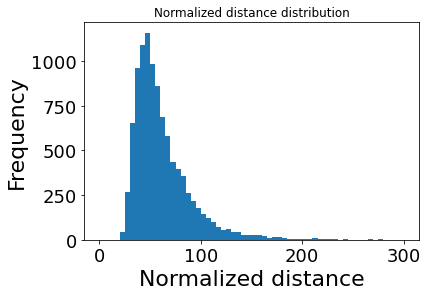

In [98]:
from oniakPlot import hist_plot
import importlib
importlib.reload(hist_plot)

hist_plot.plot_result(norm_results[:,0,0], xlabel="Normalized distance", ylabel="Frequency", 
                      figtitle="Normalized distance distribution", limits=[0, 300], nbins=60)

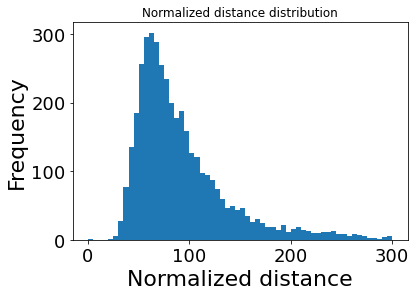

In [15]:
hist_plot.plot_result(norm_results[:,50,6], xlabel="Normalized distance", ylabel="Frequency", 
                      figtitle="Normalized distance distribution", limits=[0, 300], nbins=60)

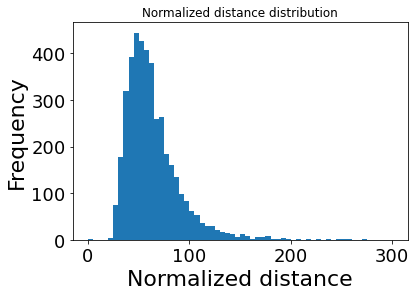

In [16]:
hist_plot.plot_result(norm_results[:,3,0], xlabel="Normalized distance", ylabel="Frequency", 
                      figtitle="Normalized distance distribution", limits=[0, 300], nbins=60)

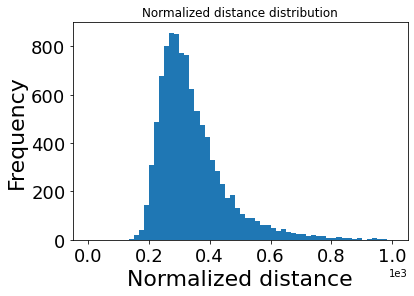

In [102]:
hist_plot.plot_result(l1_results[:,0,0], xlabel="Normalized distance", ylabel="Frequency", 
                      figtitle="Normalized distance distribution", limits=[0, 1000], nbins=60)

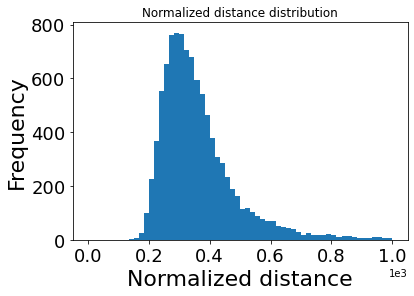

In [103]:
hist_plot.plot_result(l1_results[:,30,30], xlabel="Normalized distance", ylabel="Frequency", 
                      figtitle="Normalized distance distribution", limits=[0, 1000], nbins=60)

In [17]:
gt_dist[0, 0], gt_dist[3, 0], gt_dist[50, 6]

(2256.1733, 2244.5679, 1991.9097)

### Try to fit data against chi square distribution

In [10]:
sift0 = odats.read_file(str(root_path / "gnd_data/sift/sift_l1_q0.odat"))
sift0[0, 35222], gt_dist[0, 0]

(2256.1733, 2256.1733)

In [ ]:
import numpy as np
siftsamples = odats.read_file(str(root_path / "data/sift100sample.odat"))
np.set_printoptions(threshold=10000)
print(siftsamples[0:9])

In [ ]:
siftsamples = odats.read_file(str(root_path / "data/sift1M.odat"))
print(siftsamples[35222*9: 35223 * 9])

In [18]:
num_exp

10001

In [18]:
from oniakExp import stats
import importlib
importlib.reload(stats)

nbins = 601
num_setting = 10000

pdfs = np.empty((num_setting, nbins))
for i in range(num_setting):
    x = i // 100
    y = i % 100
    pdfs[i] = stats.cdf(norm_results[:, x, y], limits=[0, 300], nbins=nbins)

In [5]:
from oniakExp import stats
import importlib
importlib.reload(stats)

nbins = 4001
num_setting = 10000

pdfs = np.empty((num_setting, nbins))
for i in range(num_setting):
    x = i // 100
    y = i % 100
    pdfs[i] = stats.cdf(norm_results[:, x, y], limits=[0, 400], nbins=nbins)
pdfs = pdfs[pdfs[:,1000].argsort()]

NameError: name 'norm_results' is not defined

In [28]:
pdfs.shape, pdfs[2832][400:600]

((10000, 4001),
 array([0.1611    , 0.16329999, 0.16410001, 0.16590001, 0.16769999,
        0.1689    , 0.1709    , 0.1724    , 0.1743    , 0.1759    ,
        0.17730001, 0.1788    , 0.18089999, 0.18269999, 0.18430001,
        0.1858    , 0.1873    , 0.18960001, 0.1913    , 0.19329999,
        0.19509999, 0.19679999, 0.19859999, 0.2008    , 0.2025    ,
        0.20389999, 0.206     , 0.2078    , 0.2097    , 0.21170001,
        0.2139    , 0.21600001, 0.21799999, 0.22040001, 0.22229999,
        0.2237    , 0.2247    , 0.2261    , 0.2288    , 0.23119999,
        0.2342    , 0.23649999, 0.2375    , 0.23899999, 0.23989999,
        0.2419    , 0.2441    , 0.2465    , 0.249     , 0.25170001,
        0.25330001, 0.25479999, 0.25639999, 0.25839999, 0.25999999,
        0.26210001, 0.26370001, 0.2656    , 0.2676    , 0.26969999,
        0.2714    , 0.27360001, 0.27520001, 0.27720001, 0.27860001,
        0.28099999, 0.28299999, 0.28479999, 0.28659999, 0.2888    ,
        0.29170001, 0.29449999, 

In [30]:
odats.write_file("result/l2_distances.odat", pdfs)

320120001

In [7]:
from oniakExp import stats
import importlib
importlib.reload(stats)

nbins = 601
num_setting = 9999

pdfsl1 = np.empty((num_setting, nbins))
for i in range(num_setting):
    x = i // 100
    y = i % 100
    pdfsl1[i] = stats.cdf(l1_results[:, x, y], limits=[0, 6000], nbins=nbins)
l1_sorted = pdfsl1[pdfsl1[:,100].argsort()]
xsl1 = np.linspace(0, 6000, 601)

In [9]:
pdfs_sorted = pdfs[pdfs[:,100].argsort()]
xs = np.linspace(0, 6000, 601)

ValueError: x and y must have same first dimension, but have shapes (601,) and (4001,)

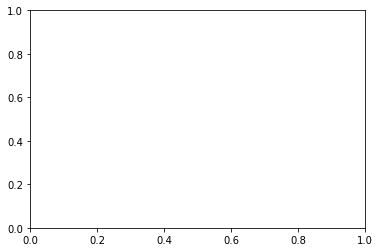

In [10]:
from oniakPlot import line_plot
line_plot.plot_result([[xs, pdfs_sorted[0]], [xs, pdfs_sorted[1000]],[xs, pdfs_sorted[5000]],[xs, pdfs_sorted[9000]], [xs, pdfs_sorted[9999]]], 
                      line_names=["0", "1000", "5000", "9000", "9999"], xlabel="Normalized distance", ylabel="CDF", legend_pos="lower right",
                      figtitle="CDF of normalized distance", limx=[0, 300], savepath="")

In [14]:
threshold = odats.read_file("../result/thresholds.odat")[:,:23]
threshold_th = odats.read_file("../result/thresholds_theory.odat")[:,:23]

In [17]:
threshold/1280

array([[0.00703125, 0.0015625 , 0.365625  , 0.36875   , 0.37109375,
        0.37421876, 0.37734374, 0.38046876, 0.38359374, 0.38671875,
        0.38984376, 0.39375   , 0.396875  , 0.40078124, 0.4046875 ,
        0.40859374, 0.41328126, 0.41796875, 0.42265624, 0.428125  ,
        0.43359375, 0.43984374, 0.44609374],
       [0.009375  , 0.00234375, 0.3796875 , 0.3828125 , 0.38515624,
        0.38828126, 0.39140624, 0.39453125, 0.39765626, 0.40078124,
        0.40390626, 0.40703124, 0.4109375 , 0.41484374, 0.41875   ,
        0.42265624, 0.4265625 , 0.43125   , 0.4359375 , 0.44140625,
        0.446875  , 0.453125  , 0.459375  ],
       [0.0078125 , 0.0015625 , 0.35703126, 0.359375  , 0.36171874,
        0.36484376, 0.3671875 , 0.3703125 , 0.3734375 , 0.3765625 ,
        0.3796875 , 0.3828125 , 0.38671875, 0.38984376, 0.39375   ,
        0.39765626, 0.40234375, 0.40625   , 0.4109375 , 0.41640624,
        0.421875  , 0.42734376, 0.43359375],
       [0.0109375 , 0.00234375, 0.365625  , 0.367

In [18]:
threshold_th/128

array([[0.0703125 , 0.015625  , 0.6945927 , 0.7005511 , 0.70667243,
        0.71298903, 0.71948314, 0.72624135, 0.7332171 , 0.7404658 ,
        0.7479786 , 0.75582826, 0.7640468 , 0.77264184, 0.7817037 ,
        0.7912423 , 0.8013501 , 0.812086  , 0.823568  , 0.8358758 ,
        0.84912825, 0.8635579 , 0.87936914],
       [0.09375   , 0.0234375 , 0.73956966, 0.7451521 , 0.7508859 ,
        0.75680846, 0.76292264, 0.7692298 , 0.7757534 , 0.7825316 ,
        0.7895575 , 0.7968882 , 0.8045268 , 0.8125219 , 0.8209361 ,
        0.829758  , 0.8390796 , 0.84894603, 0.85946524, 0.87071633,
        0.8828409 , 0.896009  , 0.9103578 ],
       [0.078125  , 0.015625  , 0.66241527, 0.6677462 , 0.6732185 ,
        0.678857  , 0.68467927, 0.690694  , 0.6969266 , 0.70339656,
        0.7101066 , 0.71708095, 0.72437954, 0.73200905, 0.7400069 ,
        0.7484138 , 0.7573018 , 0.7667565 , 0.7768298 , 0.78762066,
        0.79925483, 0.8118831 , 0.8257237 ],
       [0.109375  , 0.0234375 , 0.6854071 , 0.690

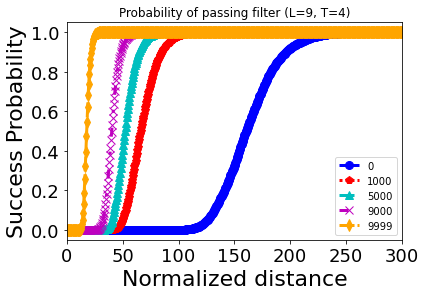

In [21]:
from scipy.stats import binom
from copy import deepcopy
# probability of having at least 4 successes in 9 trials
binom_cdf = lambda x: 1 - binom.cdf(3, 9, x)
pdfs_sorted = pdfs[pdfs[:,150].argsort()]
lines = [xs, pdfs_sorted[0]], [xs, pdfs_sorted[1000]],[xs, pdfs_sorted[5000]],[xs, pdfs_sorted[9000]], [xs, pdfs_sorted[9999]]
cdf_lines = deepcopy(lines)
for i, item in enumerate(cdf_lines):
    cdf_lines[i][1] = binom_cdf(item[1])
line_plot.plot_result(cdf_lines, 
                      line_names=["0", "1000", "5000", "9000", "9999"], xlabel="Normalized distance", ylabel="Success Probability", legend_pos="lower right",
                      figtitle="Probability of passing filter (L=9, T=4)", limx=[0, 300], savepath="")

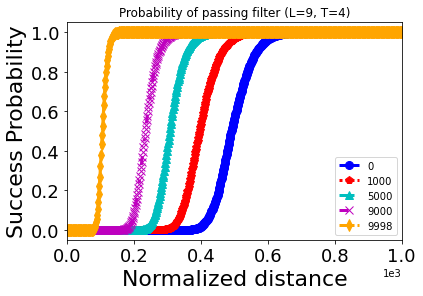

In [119]:
from scipy.stats import binom
from copy import deepcopy
# probability of having at least 4 successes in 9 trials
binom_cdf = lambda x: 1 - binom.cdf(3, 9, x)

l1_sorted = pdfsl1[pdfsl1[:,150].argsort()]
lines = [xsl1, l1_sorted[0]], [xsl1, l1_sorted[1000]],[xsl1, l1_sorted[5000]],[xsl1, l1_sorted[9000]], [xsl1, l1_sorted[9998]]
l1_lines = deepcopy(lines)
for i, item in enumerate(l1_lines):
    l1_lines[i][1] = binom_cdf(item[1])
line_plot.plot_result(l1_lines, 
                      line_names=["0", "1000", "5000", "9000", "9998"], xlabel="Normalized distance", ylabel="Success Probability", legend_pos="lower right",
                      figtitle="Probability of passing filter (L=9, T=4)", limx=[0, 1000], savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/success_prob_l1.pdf")

In [69]:
sp50 = cdf_lines[2][1]
np.searchsorted(sp50, 0.9), sp50[91]

(126, 0.1888006832729079)

In [70]:
sp50[0]

0.0

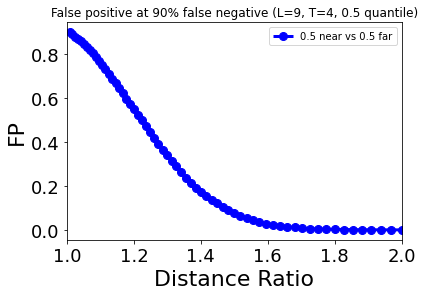

In [85]:
import importlib
importlib.reload(line_plot)


x_ratio = []
fp50 = sp50[5:126]
for i in range(5, 126):
    x_ratio.append(xs[126] / xs[i])
line_plot.plot_result([(x_ratio, fp50)], line_names=["0.5 near vs 0.5 far"], xlabel="Distance Ratio", ylabel="FP", legend_pos="best", limx=[1, 2],
                      figtitle="False positive at 90% false negative (L=9, T=4, 0.5 quantile)", savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/50_ratio.pdf")

165


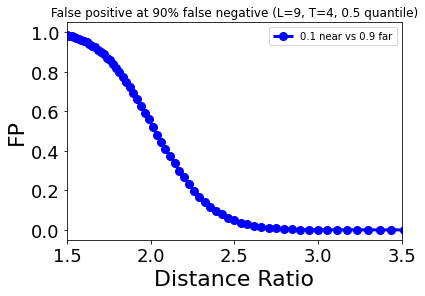

In [86]:
import importlib
importlib.reload(line_plot)

sp10 = cdf_lines[1][1]
sp90 = cdf_lines[3][1]
idx10 = np.searchsorted(sp10, 0.9)
print(idx10)
x_ratio2 = []
fp10 = sp10[5:idx10]
fp90 = sp90[5:idx10]
for i in range(5, idx10):
    x_ratio2.append(xs[idx10] / xs[i])
line_plot.plot_result([(x_ratio2, fp90)], line_names=["0.1 near vs 0.9 far"], xlabel="Distance Ratio", ylabel="FP", legend_pos="best", limx=[1.5, 3.5],
                      figtitle="False positive at 90% false negative (L=9, T=4, 0.5 quantile)", savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/10_90_ratio.pdf")

170 278


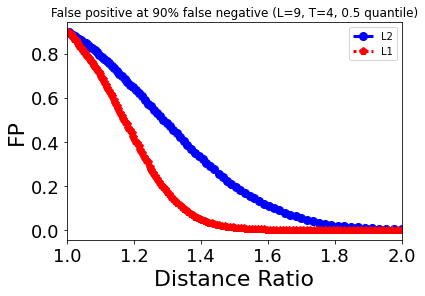

In [125]:
sp10 = cdf_lines[1][1]
sp10l1 = l1_lines[1][1]
idx10 = np.searchsorted(sp10, 0.9)
idx10l1 = np.searchsorted(sp10l1, 0.9)
print(idx10, idx10l1)
x_ratio2 = []
x_ratio3 = []
fp10 = sp10[5:idx10]
fp10l1 = sp10l1[5:idx10l1]
xs = np.linspace(0, 300, 601)
for i in range(5, idx10):
    x_ratio2.append(xs[idx10] / xs[i])
xs = np.linspace(0, 1000, 601)
for i in range(5, idx10l1):
    x_ratio3.append(xs[idx10l1] / xs[i])
line_plot.plot_result([(x_ratio2, fp10), (x_ratio3, fp10l1)], line_names=["L2", "L1"], xlabel="Distance Ratio", ylabel="FP", legend_pos="best", limx=[1, 2],
                      figtitle="False positive at 90% false negative (L=9, T=4, 0.5 quantile)", savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/10_ratio_l1.pdf")

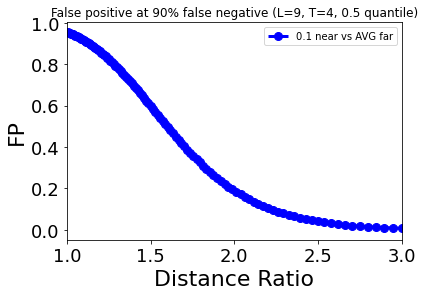

In [87]:
pdfs_part = pdfs_sorted[:, 5:idx10]
cdfs_part = binom_cdf(pdfs_part)
fp_avg = np.mean(cdfs_part, axis=0)

line_plot.plot_result([(x_ratio2, fp_avg)], line_names=["0.1 near vs AVG far"], xlabel="Distance Ratio", ylabel="FP", legend_pos="best", limx=[1, 3],
                      figtitle="False positive at 90% false negative (L=9, T=4, 0.5 quantile)", savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/10_avg_ratio.pdf")

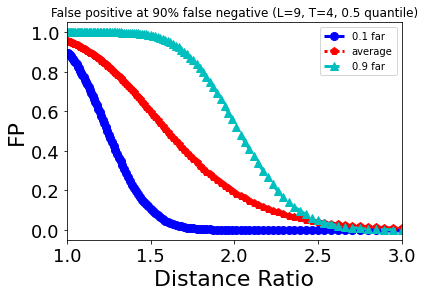

In [89]:
line_plot.plot_result([(x_ratio2, fp10), (x_ratio2, fp_avg), (x_ratio2, fp90)], 
                      line_names=["0.1 far", "average", "0.9 far"], xlabel="Distance Ratio", ylabel="FP", legend_pos="best", limx=[1, 3],
                      figtitle="False positive at 90% false negative (L=9, T=4, 0.5 quantile)", savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/all_ratio.pdf")

In [16]:
from oniakIO import odats
import pathlib
root_path = pathlib.Path("/media/gtnetuser/SSD_2TB_BEST/LpSubspace")
cids = odats.read_file(str(root_path / "data/sift100sample_ids.odat"))
cids

array([[ 35222,  10286,  47856,  74146,  33206,  45193,  59356,  89700,
         94204,  47995,  87932,  66418,   6879,  43315,  71376,   2852,
        101794,  25827,  21375,  15569,  18605,  42368,  48135,  72438,
         52369,   2811,  60582,   7276, 101162,  20067,  11776,  70135,
         79444,  51084,   1931, 105964,  65526, 105162,  98987,  42265,
         19952,  20257,  66944,  40616,  22994,   1857,   1729,  15027,
         11982,  20646,  64041,  67427, 106397,  66642,  91518,   6890,
         71413,  18245, 101748,  92818,  67472,   1655,   3217,  16611,
         42072,  77201,  38230,  76147,  85352,  71663,  76556,  98392,
         49522,   7637, 109914, 101458,  80231,  35771,  93681,  50035,
        108484, 100391,  97657,  67952,  99190,  53522,  48386, 110620,
         49329, 105880, 103194,  57640,  98676,  80355,  97296,  74616,
         31227, 100809,  74972,  49367]], dtype=int32)

In [29]:
num_exp = len(norm_results)

for i in range(num_exp):
    x = i // 100
    y = i % 100
    arr = norm_results[:, x, y]
    print(arr.mean(), arr.std(), np.median(arr), gt_dist[x, y])

61.97532741626446 29.1274563510078 54.37373456464825 2256.1733
64.7509906145262 31.744965235912883 56.37704501654941 2561.6501
95.26432398612671 55.862655205273335 79.24257303968469 2137.8608
67.06756963562219 39.465636560360274 56.036504630304464 2244.3643
59.72485285010808 28.47934308442732 52.50238353007108 2211.3218
52.226447315680815 26.751097247831016 45.21143486972034 2199.0798
77.16943984486797 41.84487489557297 65.95578141863818 2290.7883
61.33890008616612 33.06685470879666 52.373006659076395 2352.5442
81.63496180366086 42.02058135653996 70.53856822819981 2176.1956
60.71650363869953 29.15458245015416 53.32519838483775 2455.0068
58.3425491889847 30.53920602384147 50.29417530399169 2290.0454
70.20744737969538 37.073879794492 59.84978393886957 2366.1946
61.95562638769854 28.16449361458141 54.92904472691179 2233.3887
64.43628657589053 28.843975667514293 57.63861230965941 2301.6057
73.40778942641191 33.867378836383274 64.94484695800422 2184.9934
74.71740773102532 40.21822133685654 

### Draw about SJ dim reduction 128 to 25

In [4]:
import numpy as np

dirpath = root_path / "result/dpl1"
exp_list = os.listdir(str(dirpath)) 
calc_results = np.empty((len(exp_list), 100, 100))
cnt = 0
for fid, filename in enumerate(exp_list):
    if "sj" not in filename:
        continue
    full_name = str(dirpath / filename)
    data = odats.read_file(full_name)
    if data.shape != (100, 100):
        continue
    calc_results[cnt] = data
    cnt += 1
calc_results = calc_results[:cnt]
cnt

NameError: name 'os' is not defined